In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv("分三類後的data.csv", encoding = 'big5')

In [6]:
df.columns

Index(['Unnamed: 0', 'sno', 'sna_x', 'tot_x', 'mday', 'weekday', 'sbi_mean',
       'sbi_tot_mean', 'peak', 'sbi_I/D', 'Precp', 'RH', 'Station_no',
       'Temperature', '中山區', '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區',
       '大安區', '文山區', '松山區', '萬華區', 'm', 'diff', 'diff_time', 'hour', 'sna',
       'tot_y', 'dis', 'INDEX', 'Station', 'class'],
      dtype='object')

In [23]:
len(set(df['INDEX']))

78

In [4]:
set(df['weekday'])

{0, 1, 2, 3, 4, 5, 6}

In [3]:
df = df[['sno', 'tot_y', 'weekday', 'sbi_I/D', 'Precp', 'RH', 'Temperature', 'hour', '中山區',
       '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區',
       '萬華區','peak','class']]
df.tail()

,sno,tot_y,weekday,sbi_I/D,Precp,RH,Temperature,hour,中山區,中正區,...,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區,peak,class
1138883,404,30,2,-1,0.0,86,22.0,21,0,0,...,0,0,0,1,0,0,0,0,0,2
1138884,404,30,2,0,0.0,88,21.5,22,0,0,...,0,0,0,1,0,0,0,0,0,2
1138885,404,30,2,0,0.0,88,21.5,22,0,0,...,0,0,0,1,0,0,0,0,-1,2
1138886,404,30,2,0,0.0,88,21.5,23,0,0,...,0,0,0,1,0,0,0,0,0,2
1138887,404,30,2,0,0.0,88,21.5,23,0,0,...,0,0,0,1,0,0,0,0,0,2


In [4]:
df_0 = df[df['class']==0]
df_1 = df[df['class']==1]
df_2 = df[df['class']==2]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

# class = 0

In [6]:
df_0_ = df_0[['sno', 'tot_y', 'weekday', 'sbi_I/D', 'Precp', 'RH', 'Temperature', 'hour', '中山區',
       '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區',
       '萬華區']]
df_0_.tail()

,sno,tot_y,weekday,sbi_I/D,Precp,RH,Temperature,hour,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
1057225,375,48,2,0,0.0,86,22.0,21,0,0,0,0,0,0,1,0,0,0,0,0
1057226,375,48,2,1,0.0,88,21.5,22,0,0,0,0,0,0,1,0,0,0,0,0
1057227,375,48,2,0,0.0,88,21.5,22,0,0,0,0,0,0,1,0,0,0,0,0
1057228,375,48,2,0,0.0,88,21.5,23,0,0,0,0,0,0,1,0,0,0,0,0
1057229,375,48,2,0,0.0,88,21.5,23,0,0,0,0,0,0,1,0,0,0,0,0


In [7]:
#取出columns名稱
df_col = []
for i in df_0_.columns:
    df_col.append(i)
    

#正規化
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

mm_scaler = preprocessing.MinMaxScaler()
df_mm_0 = mm_scaler.fit_transform(df_0_)
df_mm_0 = pd.DataFrame(df_mm_0, columns = df_col)
df_mm_0.tail()
# sns.jointplot(data=df_mm, color='m', x=0, y=1);

,sno,tot_y,weekday,sbi_I/D,Precp,RH,Temperature,hour,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
249058,1.0,0.014925,0.333333,0.445946,0.0,0.837209,0.132979,0.913043,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
249059,1.0,0.014925,0.333333,0.459459,0.0,0.860465,0.106383,0.956522,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
249060,1.0,0.014925,0.333333,0.445946,0.0,0.860465,0.106383,0.956522,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
249061,1.0,0.014925,0.333333,0.445946,0.0,0.860465,0.106383,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
249062,1.0,0.014925,0.333333,0.445946,0.0,0.860465,0.106383,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_mm_0 = pd.concat([df_mm_0, df_0[['peak']]], axis = 1)
df_mm_0 = df_mm_0.dropna(axis=0,how='any')
df_mm_0.tail()

,sno,tot_y,weekday,sbi_I/D,Precp,RH,Temperature,hour,中山區,中正區,...,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區,peak
247561,1.0,0.014925,1.0,0.445946,0.0,0.709302,0.500000,0.173913,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
247562,1.0,0.014925,1.0,0.445946,0.0,0.720930,0.489362,0.217391,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
247563,1.0,0.014925,1.0,0.445946,0.0,0.720930,0.489362,0.217391,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
247564,1.0,0.014925,1.0,0.445946,0.0,0.709302,0.489362,0.260870,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
247565,1.0,0.014925,1.0,0.445946,0.0,0.709302,0.489362,0.260870,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [9]:
X = df_mm_0[['sno', 'tot_y', 'weekday', 'sbi_I/D', 'Precp', 'RH', 'Temperature', 'hour', '中山區',
       '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區',
       '萬華區']].values
y = df_mm_0[['peak']].values

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 1)

In [11]:
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
forest = XGBClassifier()

forest.fit(X_train, y_train)
pred_y_test = forest.predict(X_test)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

 
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [13]:
multiclass_roc_auc_score(y_test, pred_y_test)

0.5134439328887511

In [14]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test, pred_y_test, labels=[-1 ,0 ,1])))

Confusion Matrix:
[[ 121 3740    2]
 [  24 8965   19]
 [   6 3973  113]]


In [15]:
# from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [16]:
pred_y_train = forest.predict(X_train)

In [17]:
# n_estimators = 70, random_state = 1, oob_score=True, n_jobs = -1, max_features="auto"
pred_y_train = forest.predict(X_train)
print('Mean Square Error - test: %.3f' % mean_squared_error(y_test, pred_y_test))
print('Mean Square Error - train: %.3f' % mean_squared_error(y_train, pred_y_train))
print('Mean Absolute Error - test: %.3f' % mean_absolute_error(y_test, pred_y_test))
print('Mean Absolute Error - train: %.3f' % mean_absolute_error(y_train, pred_y_train))
print('R^2 - test: %.3f' % r2_score(y_test, pred_y_test))
print('R^2 - train: %.3f' % r2_score(y_train, pred_y_train))

Mean Square Error - test: 0.459
Mean Square Error - train: 0.459
Mean Absolute Error - test: 0.458
Mean Absolute Error - train: 0.458
R^2 - test: 0.021
R^2 - train: 0.024


In [18]:
def evaluate_model(predicted, actual, title):
    # ROC Curve Plotting
    fpr, tpr, thresh = roc_curve(actual, predicted)
    roc_auc = roc_auc_score(predicted, actual)
    
    print(title)
    print('Confusion Matrix:\n{}'.format(confusion_matrix(predicted, actual)))
    tp, fp, fn, tn  = confusion_matrix(actual, predicted).ravel()
    print("True positives: " + str(tp))
    print("False positives: " + str(fp))
    print("True negatives: " + str(tn))
    print("False negatives: " + str(fn))
    print("AUC: " + str(roc_auc))
    print('\n')
    return fpr, tpr, roc_auc

In [19]:
def ROC_plot(fpr1,fpr2,fpr3,tpr1,tpr2,tpr3,roc_auc1,roc_auc2,roc_auc3, title):
    plt.title('ROC')
    plt.plot(fpr1, tpr1, 'b',
    label=('AUC(peak=-1) = %0.2f'% roc_auc1))
    plt.plot(fpr2, tpr2, 'g',
    label=('AUC(peak=0) = %0.2f'% roc_auc2))
    plt.plot(fpr3, tpr3, 'orange',
    label=('AUC(peak=1) = %0.2f'% roc_auc3))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig(title+'.png', dpi=300)
    plt.show()

In [20]:
def array_to_dummy(array):
    df = pd.DataFrame(array)
    df.columns=['peak']
    df_dummies = pd.get_dummies(df.astype('str'))
    return df_dummies

In [21]:
def get_type(y_true_dummies,y_pred_dummies):
    y_s_true = np.array(y_true_dummies['peak_-1.0'])
    y_s_pred = np.array(y_pred_dummies['peak_-1.0'])
    y_m_true = np.array(y_true_dummies['peak_0.0'])
    y_m_pred = np.array(y_pred_dummies['peak_0.0'])
    y_l_true = np.array(y_true_dummies['peak_1.0'])
    y_l_pred = np.array(y_pred_dummies['peak_1.0'])
    
#     print(y_s_true.shape)
#     print(y_s_pred.shape)
#     print(y_m_true.shape)
#     print(y_m_pred.shape)
#     print(y_l_true.shape)
#     print(y_l_pred.shape)

    return y_s_true,y_s_pred,y_m_true,y_m_pred,y_l_true,y_l_pred

In [22]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
#ROC & AUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def evaluate_model_all(predicted, actual):
    
    # Table-Type Plotting
    #print('Confusion Matrix:\n{}'.format(confusion_matrix(predicted, actual)))
    print('Classification Report:\n{}'.format(classification_report(predicted, actual)))
    print('Accuracy: {}'.format(accuracy_score(predicted, actual)))
    print('Precision: {}'.format(precision_score(predicted, actual, average = "macro")))
    print('Recall: {}'.format(recall_score(predicted, actual, average = "macro")))
    print('F-1: {}'.format(f1_score(predicted, actual, average = "macro")))
    print('AUC: {}'.format(multiclass_roc_auc_score(predicted, actual)))    


    y_true_dummies = array_to_dummy(actual)
    y_pred_dummies7 = array_to_dummy(predicted)
    y_s_true,y_s_pred,y_m_true,y_m_pred,y_l_true,y_l_pred = get_type(y_true_dummies,y_pred_dummies7)
    fpr1, tpr1, roc_auc1 = evaluate_model(y_s_true, y_s_pred, '(peak=-1)')
    fpr2, tpr2, roc_auc2 = evaluate_model(y_m_true, y_m_pred, '(peak=0)')
    fpr3, tpr3, roc_auc3 = evaluate_model(y_m_true, y_m_pred, '(peak=1)')
    ROC_plot(fpr1,fpr2,fpr3,tpr1,tpr2,tpr3,roc_auc1,roc_auc2,roc_auc3, 'peak300_20_layer6_8月_0.001')

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.80      0.03      0.06      3863
         0.0       0.54      1.00      0.70      9008
         1.0       0.84      0.03      0.05      4092

    accuracy                           0.54     16963
   macro avg       0.73      0.35      0.27     16963
weighted avg       0.67      0.54      0.40     16963

Accuracy: 0.5422979425809114
Precision: 0.7273808539855842
Recall: 0.35138804324446055
F-1: 0.2706043610479229
AUC: 0.5134439328887511
(peak=-1)
Confusion Matrix:
[[13070  3742]
 [   30   121]]
True positives: 13070
False positives: 30
True negatives: 121
False negatives: 3742
AUC: 0.7893726965759242


(peak=0)
Confusion Matrix:
[[ 242   43]
 [7713 8965]]
True positives: 242
False positives: 7713
True negatives: 8965
False negatives: 43
AUC: 0.6933286417867429


(peak=1)
Confusion Matrix:
[[ 242   43]
 [7713 8965]]
True positives: 242
False positives: 7713
True negatives: 8965
False negati

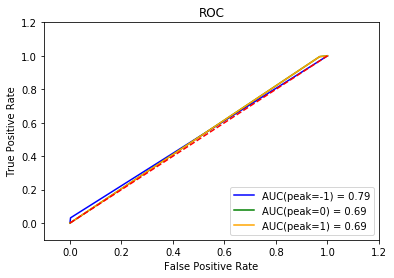

In [24]:
evaluate_model_all(y_test, forest.predict(X_test))

## 調參

0.22773094381889997
0.5964157283499381
0.5422979425809114
0.535459529564346
0.5315687083652656
0.5313918528562165
0.5313918528562165


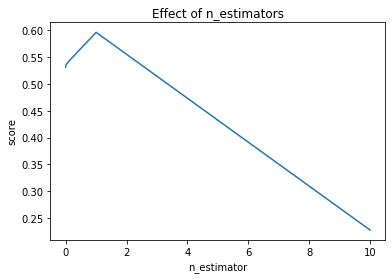

In [25]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = [10,1,0.1,0.01,0.001,0.0001,0.00001]
scores = []
for n in estimators:
    forest.set_params(learning_rate=n)
    forest.fit(X_train, y_train)
    test_y_predicted = forest.predict(X_test)
    score = accuracy_score(y_test, test_y_predicted)
    scores.append(score)
    #scores.append(model.score(x_test, y_test))
    print(score)
    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [26]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(12, 53, 4)
scores = []
for n in estimators:
    forest.set_params(learning_rate= 1, max_depth=n)
    forest.fit(X_train, y_train)
    test_y_predicted = forest.predict(X_test)
    score = accuracy_score(y_test, test_y_predicted)
    scores.append(score)
    #scores.append(model.score(x_test, y_test))
    print(score)
    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

0.7379590874255733
0.7387254612981194
0.7416730531156045
0.7423215233154513
0.7393739314979662
0.7381948947709721
0.7384896539527206
0.7384896539527206
0.738430702116371


KeyboardInterrupt: 

In [27]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    forest.set_params(learning_rate= 1, max_depth=24, n_estimators=n)
    forest.fit(X_train, y_train)
    test_y_predicted = forest.predict(X_test)
    score = accuracy_score(y_test, test_y_predicted)
    scores.append(score)
    #scores.append(model.score(x_test, y_test))
    print(score)
    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

0.7384896539527206
0.7415551494429051
0.7421446678064022
0.7425573306608501
0.7412014384248069
0.7413193420975064
0.7419678122973531
0.7423215233154513
0.741790956788304
0.7423215233154513
0.7417320049519542
0.7422036196427518
0.7409066792430584
0.7412603902611566
0.7416730531156045
0.7413193420975064


KeyboardInterrupt: 

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.72      0.67      0.70      3863
         0.0       0.76      0.79      0.77      9008
         1.0       0.73      0.71      0.72      4092

    accuracy                           0.74     16963
   macro avg       0.74      0.72      0.73     16963
weighted avg       0.74      0.74      0.74     16963

Accuracy: 0.7423215233154513
Precision: 0.7353834428040101
Recall: 0.7234416160015215
F-1: 0.7290276795449778
AUC: 0.7870672917347075
(peak=-1)
Confusion Matrix:
[[12077  1258]
 [ 1023  2605]]
True positives: 12077
False positives: 1023
True negatives: 2605
False negatives: 1258
AUC: 0.8118441265679718


(peak=0)
Confusion Matrix:
[[5670 1925]
 [2285 7083]]
True positives: 5670
False positives: 2285
True negatives: 7083
False negatives: 1925
AUC: 0.7513141609636886


(peak=1)
Confusion Matrix:
[[5670 1925]
 [2285 7083]]
True positives: 5670
False positives: 2285
True negatives: 7083
False 

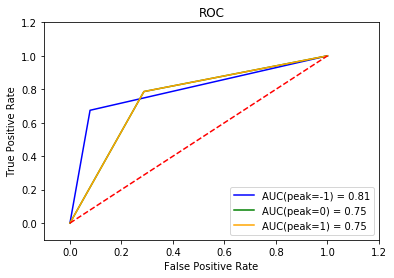

In [28]:
forest = XGBClassifier(learning_rate= 1, max_depth=24, n_estimaters = 40)
forest.fit(X_train, y_train)

evaluate_model_all(y_test, forest.predict(X_test))
# 1:23~1:27

# class=1

In [102]:
df_1_ = df_1[['sno', 'tot_y', 'weekday', 'sbi_I/D', 'Precp', 'RH', 'Temperature', 'hour', '中山區',
       '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區',
       '萬華區']]
df_1_.tail()

,sno,tot_y,weekday,sbi_I/D,Precp,RH,Temperature,hour,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
1133038,402,28,2,0,0.0,94,21.6,21,0,0,0,1,0,0,0,0,0,0,0,0
1133039,402,28,2,0,0.0,95,21.8,22,0,0,0,1,0,0,0,0,0,0,0,0
1133040,402,28,2,0,0.0,95,21.8,22,0,0,0,1,0,0,0,0,0,0,0,0
1133041,402,28,2,0,0.0,95,21.7,23,0,0,0,1,0,0,0,0,0,0,0,0
1133042,402,28,2,0,0.0,95,21.7,23,0,0,0,1,0,0,0,0,0,0,0,0


In [103]:
#取出columns名稱
df_col = []
for i in df_1_.columns:
    df_col.append(i)
    

#正規化
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

mm_scaler = preprocessing.MinMaxScaler()
df_mm_1 = mm_scaler.fit_transform(df_1_)
df_mm_1 = pd.DataFrame(df_mm_1, columns = df_col)
df_mm_1.tail()
# sns.jointplot(data=df_mm, color='m', x=0, y=1);

,sno,tot_y,weekday,sbi_I/D,Precp,RH,Temperature,hour,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
215243,1.0,0.210526,0.333333,0.473684,0.0,0.930233,0.111702,0.913043,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215244,1.0,0.210526,0.333333,0.473684,0.0,0.941860,0.122340,0.956522,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215245,1.0,0.210526,0.333333,0.473684,0.0,0.941860,0.122340,0.956522,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215246,1.0,0.210526,0.333333,0.473684,0.0,0.941860,0.117021,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215247,1.0,0.210526,0.333333,0.473684,0.0,0.941860,0.117021,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
df_mm_1 = pd.concat([df_mm_1, df_1[['peak']]], axis = 1)
df_mm_1 = df_mm_1.dropna(axis=0,how='any')
df_mm_1.tail()

,sno,tot_y,weekday,sbi_I/D,Precp,RH,Temperature,hour,中山區,中正區,...,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區,peak
204272,0.975069,0.105263,0.833333,0.473684,0.0,0.674419,0.510638,0.869565,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204273,0.975069,0.105263,0.833333,0.473684,0.0,0.674419,0.510638,0.869565,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204274,0.975069,0.105263,0.833333,0.473684,0.0,0.686047,0.505319,0.913043,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
204275,0.975069,0.105263,0.833333,0.473684,0.0,0.686047,0.505319,0.913043,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
204276,0.975069,0.105263,0.833333,0.473684,0.0,0.674419,0.505319,0.956522,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
X = df_mm_1[['sno', 'tot_y', 'weekday', 'sbi_I/D', 'Precp', 'RH', 'Temperature', 'hour', '中山區',
       '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區',
       '萬華區']].values
y = df_mm_1[['peak']].values

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 1)

In [46]:
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
forest = XGBClassifier()

forest.fit(X_train, y_train)
pred_y_test = forest.predict(X_test)

In [107]:
y_test

array([[-1.],
       [ 1.],
       [ 0.],
       ...,
       [ 0.],
       [ 0.],
       [-1.]])

In [47]:
multiclass_roc_auc_score(y_test, pred_y_test)

0.5529207261985684

In [48]:
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test, pred_y_test, labels=[-1 ,0 ,1])))

Confusion Matrix:
[[ 163  544    1]
 [ 108 1569   31]
 [  14  620   48]]


In [49]:
# n_estimators = 70, random_state = 1, oob_score=True, n_jobs = -1, max_features="auto"
pred_y_train = forest.predict(X_train)
print('Mean Square Error - test: %.3f' % mean_squared_error(y_test, pred_y_test))
print('Mean Square Error - train: %.3f' % mean_squared_error(y_train, pred_y_train))
print('Mean Absolute Error - test: %.3f' % mean_absolute_error(y_test, pred_y_test))
print('Mean Absolute Error - train: %.3f' % mean_absolute_error(y_train, pred_y_train))
print('R^2 - test: %.3f' % r2_score(y_test, pred_y_test))
print('R^2 - train: %.3f' % r2_score(y_train, pred_y_train))

Mean Square Error - test: 0.440
Mean Square Error - train: 0.418
Mean Absolute Error - test: 0.430
Mean Absolute Error - train: 0.410
R^2 - test: 0.019
R^2 - train: 0.061


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.57      0.23      0.33       708
         0.0       0.57      0.92      0.71      1708
         1.0       0.60      0.07      0.13       682

    accuracy                           0.57      3098
   macro avg       0.58      0.41      0.39      3098
weighted avg       0.58      0.57      0.49      3098

Accuracy: 0.5745642349903163
Precision: 0.5820080754392385
Recall: 0.4064084957836806
F-1: 0.38695998390831304
AUC: 0.5529207261985684
(peak=-1)
Confusion Matrix:
[[2268  545]
 [ 122  163]]
True positives: 2268
False positives: 122
True negatives: 163
False negatives: 545
AUC: 0.6890932450215479


(peak=0)
Confusion Matrix:
[[ 226  139]
 [1164 1569]]
True positives: 226
False positives: 1164
True negatives: 1569
False negatives: 139
AUC: 0.5966362419740463


(peak=1)
Confusion Matrix:
[[ 226  139]
 [1164 1569]]
True positives: 226
False positives: 1164
True negatives: 1569
False negatives:

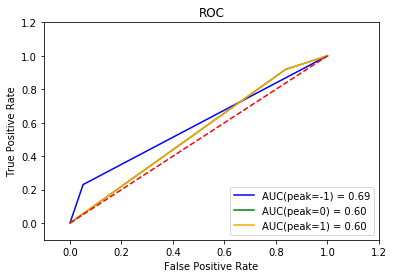

In [50]:
evaluate_model_all(y_test, forest.predict(X_test))

## 調參

0.22014202711426728
0.6216914138153647
0.5745642349903163
0.552937378954164
0.5551969012265978
0.5551969012265978
0.5551969012265978


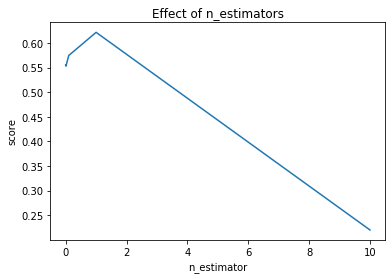

In [51]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = [10,1,0.1,0.01,0.001,0.0001,0.00001]
scores = []
for n in estimators:
    forest.set_params(learning_rate=n)
    forest.fit(X_train, y_train)
    test_y_predicted = forest.predict(X_test)
    score = accuracy_score(y_test, test_y_predicted)
    scores.append(score)
    #scores.append(model.score(x_test, y_test))
    print(score)
    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [52]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(12, 53, 4)
scores = []
for n in estimators:
    forest.set_params(learning_rate= 1, max_depth=n)
    forest.fit(X_train, y_train)
    test_y_predicted = forest.predict(X_test)
    score = accuracy_score(y_test, test_y_predicted)
    scores.append(score)
    #scores.append(model.score(x_test, y_test))
    print(score)
    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

0.7585539057456423
0.7572627501613944
0.7659780503550678
0.7591994835377663
0.7575855390574564
0.7582311168495803
0.763395739186572
0.7591994835377663
0.7598450613298903
0.7595222724338283


KeyboardInterrupt: 

In [53]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    forest.set_params(learning_rate= 1, max_depth=20, n_estimators=n)
    forest.fit(X_train, y_train)
    test_y_predicted = forest.predict(X_test)
    score = accuracy_score(y_test, test_y_predicted)
    scores.append(score)
    #scores.append(model.score(x_test, y_test))
    print(score)
    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

0.7566171723692705
0.7643641058747579
0.762104583602324
0.7672692059393157
0.7653324725629438
0.7656552614590059
0.7653324725629438
0.7653324725629438
0.7663008392511298
0.7659780503550678
0.7650096836668818


KeyboardInterrupt: 

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.73      0.71      0.72       708
         0.0       0.79      0.81      0.80      1708
         1.0       0.75      0.72      0.73       682

    accuracy                           0.77      3098
   macro avg       0.75      0.75      0.75      3098
weighted avg       0.77      0.77      0.77      3098

Accuracy: 0.7659780503550678
Precision: 0.7548300778596125
Recall: 0.745887560997493
F-1: 0.7501808264535312
AUC: 0.8037974136995869
(peak=-1)
Confusion Matrix:
[[2204  203]
 [ 186  505]]
True positives: 2204
False positives: 186
True negatives: 505
False negatives: 203
AUC: 0.8232437710320297


(peak=0)
Confusion Matrix:
[[1017  329]
 [ 373 1379]]
True positives: 1017
False positives: 373
True negatives: 1379
False negatives: 329
AUC: 0.7713362609999526


(peak=1)
Confusion Matrix:
[[1017  329]
 [ 373 1379]]
True positives: 1017
False positives: 373
True negatives: 1379
False negatives: 3

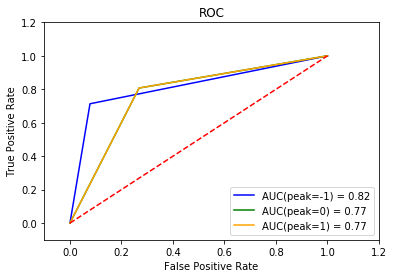

In [54]:
forest = XGBClassifier(learning_rate= 1, max_depth=20, n_estimaters = 40)
forest.fit(X_train, y_train)

evaluate_model_all(y_test, forest.predict(X_test))
# 1:48~1:48

# class = 2

In [108]:
df_2_ = df_2[['sno', 'tot_y', 'weekday', 'sbi_I/D', 'Precp', 'RH', 'Temperature', 'hour', '中山區',
       '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區',
       '萬華區']]
df_2_.tail()

,sno,tot_y,weekday,sbi_I/D,Precp,RH,Temperature,hour,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
1138883,404,30,2,-1,0.0,86,22.0,21,0,0,0,0,0,0,0,1,0,0,0,0
1138884,404,30,2,0,0.0,88,21.5,22,0,0,0,0,0,0,0,1,0,0,0,0
1138885,404,30,2,0,0.0,88,21.5,22,0,0,0,0,0,0,0,1,0,0,0,0
1138886,404,30,2,0,0.0,88,21.5,23,0,0,0,0,0,0,0,1,0,0,0,0
1138887,404,30,2,0,0.0,88,21.5,23,0,0,0,0,0,0,0,1,0,0,0,0


In [109]:
#取出columns名稱
df_col = []
for i in df_2_.columns:
    df_col.append(i)
    

#正規化
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

mm_scaler = preprocessing.MinMaxScaler()
df_mm_2 = mm_scaler.fit_transform(df_2_)
df_mm_2 = pd.DataFrame(df_mm_2, columns = df_col)
df_mm_2.tail()
# sns.jointplot(data=df_mm, color='m', x=0, y=1);

,sno,tot_y,weekday,sbi_I/D,Precp,RH,Temperature,hour,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
674572,1.0,0.307692,0.333333,0.514706,0.0,0.837209,0.132979,0.913043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
674573,1.0,0.307692,0.333333,0.529412,0.0,0.860465,0.106383,0.956522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
674574,1.0,0.307692,0.333333,0.529412,0.0,0.860465,0.106383,0.956522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
674575,1.0,0.307692,0.333333,0.529412,0.0,0.860465,0.106383,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
674576,1.0,0.307692,0.333333,0.529412,0.0,0.860465,0.106383,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [110]:
df_mm_2 = pd.concat([df_mm_2, df_2[['peak']]], axis = 1)
df_mm_2 = df_mm_2.dropna(axis=0,how='any')
df_mm_2.tail()

,sno,tot_y,weekday,sbi_I/D,Precp,RH,Temperature,hour,中山區,中正區,...,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區,peak
669358,0.997506,0.230769,0.666667,0.529412,0.0,0.813953,0.425532,0.043478,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669359,0.997506,0.230769,0.666667,0.529412,0.0,0.813953,0.425532,0.043478,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669360,0.997506,0.230769,0.666667,0.529412,0.0,0.802326,0.430851,0.086957,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669361,0.997506,0.230769,0.666667,0.529412,0.0,0.802326,0.430851,0.086957,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669362,0.997506,0.230769,0.666667,0.529412,0.0,0.813953,0.393617,0.130435,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
X = df_mm_2[['sno', 'tot_y', 'weekday', 'sbi_I/D', 'Precp', 'RH', 'Temperature', 'hour', '中山區',
       '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區',
       '萬華區']].values
y = df_mm_2[['peak']].values

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 1)

In [113]:
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
forest = XGBClassifier()

forest.fit(X_train, y_train)
pred_y_test = forest.predict(X_test)

In [114]:
multiclass_roc_auc_score(y_test, pred_y_test)

0.5

In [115]:
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test, pred_y_test, labels=[-1 ,0 ,1])))

Confusion Matrix:
[[    0 15435     0]
 [    0 36417     0]
 [    0 15491     0]]


In [101]:
y_test

array([[ 0.],
       [ 0.],
       [ 1.],
       ...,
       [ 0.],
       [-1.],
       [ 0.]])

In [58]:
# n_estimators = 70, random_state = 1, oob_score=True, n_jobs = -1, max_features="auto"
pred_y_train = forest.predict(X_train)
print('Mean Square Error - test: %.3f' % mean_squared_error(y_test, pred_y_test))
print('Mean Square Error - train: %.3f' % mean_squared_error(y_train, pred_y_train))
print('Mean Absolute Error - test: %.3f' % mean_absolute_error(y_test, pred_y_test))
print('Mean Absolute Error - train: %.3f' % mean_absolute_error(y_train, pred_y_train))
print('R^2 - test: %.3f' % r2_score(y_test, pred_y_test))
print('R^2 - train: %.3f' % r2_score(y_train, pred_y_train))

Mean Square Error - test: 0.459
Mean Square Error - train: 0.459
Mean Absolute Error - test: 0.459
Mean Absolute Error - train: 0.459
R^2 - test: -0.000
R^2 - train: -0.000


In [65]:
evaluate_model_all(y_test, forest.predict(X_test))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00     15435
         0.0       0.54      1.00      0.70     36417
         1.0       0.00      0.00      0.00     15491

    accuracy                           0.54     67343
   macro avg       0.18      0.33      0.23     67343
weighted avg       0.29      0.54      0.38     67343

Accuracy: 0.5407688995144262
Precision: 0.18025629983814206
Recall: 0.3333333333333333
F-1: 0.233982266769468
AUC: 0.5


KeyError: 'peak_-1'

## 調參

In [ ]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = [10,1,0.1,0.01,0.001,0.0001,0.00001]
scores = []
for n in estimators:
    forest.set_params(learning_rate=n)
    forest.fit(X_train, y_train)
    test_y_predicted = forest.predict(X_test)
    score = accuracy_score(y_test, test_y_predicted)
    scores.append(score)
    #scores.append(model.score(x_test, y_test))
    print(score)
    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(12, 53, 4)
scores = []
for n in estimators:
    forest.set_params(learning_rate= 1, max_depth=n)
    forest.fit(X_train, y_train)
    test_y_predicted = forest.predict(X_test)
    score = accuracy_score(y_test, test_y_predicted)
    scores.append(score)
    #scores.append(model.score(x_test, y_test))
    print(score)
    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    forest.set_params(learning_rate= 1, max_depth=24, n_estimators=n)
    forest.fit(X_train, y_train)
    test_y_predicted = forest.predict(X_test)
    score = accuracy_score(y_test, test_y_predicted)
    scores.append(score)
    #scores.append(model.score(x_test, y_test))
    print(score)
    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
forest = XGBClassifier(learning_rate= 1, max_depth=24, n_estimaters = 40)
forest.fit(X_train, y_train)

evaluate_model_all(y_test, forest.predict(X_test))
# 1:23~1:27